In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

CheXpert Race Validation on CheXpert Test Set

In [ ]:
df = pd.read_csv('/content/chexpert_race_v2_split.csv')
df['Path'] = df['Path'].str.replace('-small','')
test_df = df[df.split=='test']
chexpert_race2_model = load_learner('/content/sample_data/chexpert_race2.pkl')

In [ ]:
chexpert_race2_model.dls.to(device='cuda')
chexpert_race2_model.model.to(device='cuda')
race_test_dl = chexpert_race2_model.dls.test_dl(test_df)
race_preds = chexpert_race2_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Race/Ethnicity'] = test_df[['Race/Ethnicity']]
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()

In [ ]:
chexpert_race2_model.dls.vocab

['Hispanic/Latino', 'Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

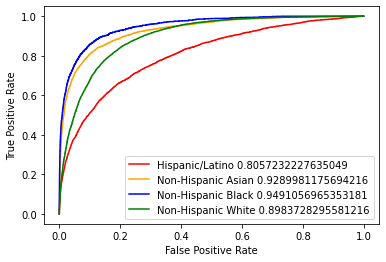

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[0] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Hispanic/Latino')
plt.plot(fpr,tpr, color='red', label='Hispanic/Latino ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[1] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Asian')
plt.plot(fpr,tpr, color='orange', label='Non-Hispanic Asian ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[2] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Black')
plt.plot(fpr,tpr, color='blue', label='Non-Hispanic Black ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[3] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic White')
plt.plot(fpr,tpr, color='green', label='Non-Hispanic White ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race2_chexpert_test.csv')

        level_0  ...                                                               Race/Ethnicity_Probability
3             3  ...      [0.5287588834762573, 0.15159906446933746, 0.22164630889892578, 0.09799575060606003]
51           51  ...  [0.003447952214628458, 0.9896894693374634, 5.725949085899629e-05, 0.006805312354117632]
68           68  ...       [0.5030557513237, 0.05141598358750343, 0.0020609917119145393, 0.44346725940704346]
75           75  ...     [0.20630085468292236, 0.008734885603189468, 0.01876690797507763, 0.7661973237991333]
207         207  ...   [0.014247423969209194, 0.9695906043052673, 0.002830249024555087, 0.013331864029169083]
...         ...  ...                                                                                      ...
151445   151584  ...   [0.26027464866638184, 0.0048715523444116116, 0.008206719532608986, 0.7266470789909363]
151448   151587  ...      [0.23160433769226074, 0.11308462917804718, 0.007061927579343319, 0.648249089717865]
151453   1

MIMIC Race Classifier Validation on CheXpert Test Set

In [ ]:
df = pd.read_csv('/content/chexpert_race_v2_split.csv')
df['Path'] = df['Path'].str.replace('-small','')
df['Path'] = 'content/s3/CheXpert/' + df['Path'].astype(str)
test_df = df[df.split=='test']
mimic_race_model = load_learner('/content/sample_data/mimic_race.pkl')

In [ ]:
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
predict_df = pd.DataFrame(test_df[['Path']])
predict_df['Race/Ethnicity'] = test_df[['Race/Ethnicity']]
predict_df['Race/Ethnicity_Tensor_Id'] =race_preds[2].numpy()
predict_df['Race/Ethnicity_Probability'] =race_preds[0].numpy().tolist()
mimic_race_model.dls.vocab

['Asian', 'Black', 'Hispanic/Latino', 'Other', 'White']

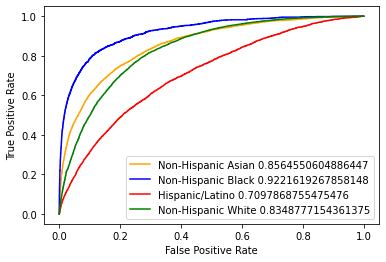

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[0] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Asian')
plt.plot(fpr,tpr, color='orange', label='Non-Hispanic Asian ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[1] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic Black')
plt.plot(fpr,tpr, color='blue', label='Non-Hispanic Black ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[2] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Hispanic/Latino')
plt.plot(fpr,tpr, color='red', label='Hispanic/Latino ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Race/Ethnicity'],y_score = [prob[4] for prob in predict_df['Race/Ethnicity_Probability']], pos_label = 'Non-Hispanic White')
plt.plot(fpr,tpr, color='green', label='Non-Hispanic White ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_chexpert_race_v2_test.csv')

        level_0  index  \
3             3    4.0   
51           51   60.0   
68           68   77.0   
75           75   84.0   
207         207  224.0   
...         ...    ...   
151445   151584    NaN   
151448   151587    NaN   
151453   151592    NaN   
151458   151597    NaN   
151469   151608    NaN   

                                                                                 Path  \
3       content/s3/CheXpert/CheXpert-v1.0/train/patient00004/study1/view1_frontal.jpg   
51      content/s3/CheXpert/CheXpert-v1.0/train/patient00029/study1/view1_frontal.jpg   
68      content/s3/CheXpert/CheXpert-v1.0/train/patient00041/study1/view1_frontal.jpg   
75      content/s3/CheXpert/CheXpert-v1.0/train/patient00051/study1/view1_frontal.jpg   
207     content/s3/CheXpert/CheXpert-v1.0/train/patient00103/study1/view1_frontal.jpg   
...                                                                               ...   
151445  content/s3/CheXpert/CheXpert-v1.0/train/patient64425/stu